# **Bellabeat - Data Analytics Case Study**


Author: Vishesh Saini\
Date: 28 July 2023

# *Ask Phase*

## **Scenario**

Bellabeat is a successful high-tech manufacturer of health-focused products for women, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. Therefore, my marketing analyst team needs to focus on one of Bellabeats’s products and analyze and undertand smart device data to gain insight into how consumers are using their smart devices. From these insights discovered, my team will then help guide marketing strategy for the company. My team will present our analysis to the Bellabeat executive team along with our high-level recommendations for Bellabeat’s marketing strategy.

By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became
available through a growing number of online retailers in addition to their own e-commerce channel on their website. The
company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She
has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to
gain insight into how people are already using their smart devices. Then, using this information, she would like high-level
recommendations for how these trends can inform Bellabeat marketing strategy.

**Problem:** Bellabeat needs to expand and grow as a global health-focused smart product company.\
**Solution:** Understand how clients are using their Bellabeat smart devices and uncover health trends.

### **Business Task/Purpose:**

**Analyze smart device usage data to identify trends and insights related to Bellabeat products in order to help inform and shape Bellabeat's marketing strategy.**

Stakeholders: Executive team members Urška Sršen and Sando Mur, and the Bellabeat marketing analytics team.

# *Prepare Phase*

### **Data Sources:**

Data Source: FitBit Fitness Tracker Data from Mobius: https://www.kaggle.com/arashnic/fitbit, generated from a distributed survey via Amazon Mechanical Turk.
The dataset has 18 CSV files that contains recorded data from 30 participants, covering data from 04-11-2016 through 05-12-2016.

This is data that comes from the FitBit Fitness Tracker Data that was generated from a distributed survey via Amazon Mechanical Turk, so it’s objective, unbiased and credible. The data sources are also comprehensive, accurate and relevant to solve our business problem because they include all the factors that we need to analyzed smart device usage.

To evaluate the data’s credibility and integrity in detail, we can assess the most important data aspects:
- Reliability: The data is reliable because it’s from 30 FitBit users who consented to the submission of personal tracker data and generated from a distributed survey via Amazon Mechanical Turk.
- Original: The data is original because they’re real Fitbit users who consented to the submission of personal tracker data via Amazon Mechanical Turk.
- Comprehensive: The data is comprehensive for the most part because it has many factors like physical activity, sleep and calories recorded by date and time. However, the data contains a sample that only covers one month so it’s limited in this regard.
- Current: The data is not current because it’s from March 2016 to May 2016.
- Cited: The data is cited because we know it’s from the FitBit Fitness Tracker Data that was generated from a distributed survey via Amazon Mechanical Turk.

It’s important to address the data-privacy issues present and we can use it because the 30 FitBit users have consented to the submission of personal tracker data via Amazon Mechanical Turk.\
These spreadsheets are organized in a wide format, where each row represents one specific record and the columns contain different attributes of the record, which include the minute-level output for physical activity, heart rate, steps taken and sleep monitoring, among others.


### Installing packages needed for the analysis
Intalling the R packages and loading the libraries needed for our analysis.

In [1]:
#Loading our packages
library(tidyverse)
library(janitor)
library(lubridate)
library(skimr)
library(ggplot2)
library(dplyr)
library(tidyr)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




### Loading the files
Creating our Data Frames into R using the csv files:

In [2]:
#Importing our data from CSV files into data frames
daily_activity <- read.csv("/kaggle/input/csv-files/dailyActivity_merged.csv")
daily_sleep <- read.csv("/kaggle/input/csv-files/sleepDay_merged.csv")
heartrate_seconds <- read.csv("/kaggle/input/csv-files/heartrate_seconds_merged.csv")
weight_info <- read.csv("/kaggle/input/csv-files/weightLogInfo_merged.csv")

### Inspecting our data

In [3]:
#Using head() to get an overview of our data
head(daily_activity)
head(daily_sleep)
head(weight_info)
head(heartrate_seconds)

#Using str() to check the datatype of every column in our data frames
str(daily_activity)
str(daily_sleep)
str(weight_info)
str(heartrate_seconds)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

# *Process Phase*
### Changing the data formats
After inspecting our data we see that the dates of all the data frames have the format character, so we change them to a date and date time format:

In [4]:
#Changing the datatype of Dates and Time in all of our Data Frames
daily_activity <- daily_activity %>%
  mutate(ActivityDate = as.Date(ActivityDate, format = "%m/%d/%Y"))
str(daily_activity)
daily_sleep <- daily_sleep %>%
  mutate(SleepDay = as.Date(SleepDay, format = "%m/%d/%Y"))
weight_info <- weight_info %>%
  mutate(Date = as.Date(Date, format = "%m/%d/%Y %H:%M:%S %p"))
heartrate_seconds <- heartrate_seconds %>%
  mutate(Time = as.Date(Time, format = "%m/%d/%Y %H:%M:%S %p"))

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : Date, format: "2016-04-12" "2016-04-13" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 1149 775 818 

### Checking for duplicated rows and deleting them
We check for duplicated data so we can delete them:

In [5]:
#Checking if there are any duplicates in our data
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(weight_info))
sum(duplicated(heartrate_seconds))

#Removing the duplicates we found in our daily_sleep data frame
daily_sleep <- daily_sleep[!duplicated(daily_sleep), ]

#Checking if our duplicated were removed or not
sum(duplicated(daily_sleep))

[1] 0

[1] 3

[1] 0

[1] 2456151

[1] 0

### Checking how many users have entered there data in our Data frames

In [6]:
#Checking how many fitbit users have actually entered data in these data frames
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
n_distinct(weight_info)
n_distinct(heartrate_seconds$Id)

[1] 33

[1] 24

[1] 67

[1] 14

## Adding Columns

### Adding columns to the daily_activity dataframe
Adding a column total_active_hours.

In [7]:
#Adding columns in the data frame daily_activity
daily_activity <- mutate(daily_activity, total_active_hours = (VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)/60)
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_active_hours
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,6.100000
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,4.283333
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,3.700000
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,4.533333
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,4.450000
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,3.700000


### Adding columns to the daily_sleep dataframe
Adding a column tine_except_sleeping_in_bed

In [8]:
#Adding column in the data frame daily_sleep
daily_sleep <- mutate(daily_sleep, time_except_sleeping_in_bed = TotalTimeInBed - TotalMinutesAsleep)
head(daily_sleep)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,time_except_sleeping_in_bed
,<dbl>,<date>,<int>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346,19
2,1503960366,2016-04-13,2,384,407,23
3,1503960366,2016-04-15,1,412,442,30
4,1503960366,2016-04-16,2,340,367,27
5,1503960366,2016-04-17,1,700,712,12
6,1503960366,2016-04-19,1,304,320,16


### Renaming Date Columns
We'll be renaming our Date and time columns to a same name "date"

In [9]:
#Renaming Date columns to date in all data frames
daily_activity <- daily_activity %>%
  rename(date = ActivityDate)
head(daily_activity)
daily_sleep <- daily_sleep %>%
  rename(date = SleepDay)
weight_info <- weight_info %>%
  rename(date = Date)

,Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_active_hours
,<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,6.100000
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,4.283333
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,3.700000
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,4.533333
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,4.450000
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,3.700000


### Removing the column fat
The only table that has missing data is the weight_log dataframe. I will remove the column fat since almost all values are missing.

In [10]:
#I just went through the fat column in the weight info data table, and it has only NA values except 1. So deleting this column would be a better option
weight_info <- subset(weight_info, select = -Fat)

### **Data Cleaning Documentation**
### **Change Log**

- The R program was selected for its high functionality at cleaning data. Created 4 data frames while importing CSV files into R, with names daily_activity, daily_sleep, weight_info, heartrate_seconds.
- Added column total_active_hours to the daily_activity data frame.
- Added column time_except_sleeping_in_bed to the daily_sleep data frame.

**Changes**
- Changed the format of the dates from all the data frames from character to date or date time.

**Removed**

- Removed duplicated data rows from daily_sleep.
- Removed duplicated data rows from minute_sleep.
- Removed the column fat from the weight_log data frame.

After these steps it's confirmed that the data is integral, clean and ready to analyze.

# *Analyze and Share Phases*
### **Analyzing and Visualizing Data**

### Summary Statistics
First we're going to analyze summary statistics to extract some general insights:

In [11]:
#Creating summary statistics of our 2 data frames

#Summary on Weight
weight_info %>% 
  select(WeightKg, WeightPounds, BMI) %>%
  summary()

#Summary on Activity
daily_activity %>% 
  select(TotalSteps, total_active_hours, TotalDistance, SedentaryMinutes, Calories) %>%
  summary()

#Summary on Active Mintues
daily_activity %>% 
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>%
  summary()

#Summary on Active Distances
daily_activity %>%
  select(VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance) %>%
  summary()

#Summary on Sleeping
daily_sleep %>% 
  select(TotalMinutesAsleep, TotalTimeInBed, time_except_sleeping_in_bed) %>%
  summary()

#Summary on Heart rate
heartrate_seconds %>%
  select(Value) %>%
  summary()


    WeightKg       WeightPounds        BMI       
 Min.   : 52.60   Min.   :116.0   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:135.4   1st Qu.:23.96  
 Median : 62.50   Median :137.8   Median :24.39  
 Mean   : 72.04   Mean   :158.8   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:187.5   3rd Qu.:25.56  
 Max.   :133.50   Max.   :294.3   Max.   :47.54  

   TotalSteps    total_active_hours TotalDistance    SedentaryMinutes
 Min.   :    0   Min.   :0.000      Min.   : 0.000   Min.   :   0.0  
 1st Qu.: 3790   1st Qu.:2.446      1st Qu.: 2.620   1st Qu.: 729.8  
 Median : 7406   Median :4.117      Median : 5.245   Median :1057.5  
 Mean   : 7638   Mean   :3.792      Mean   : 5.490   Mean   : 991.2  
 3rd Qu.:10727   3rd Qu.:5.287      3rd Qu.: 7.713   3rd Qu.:1229.5  
 Max.   :36019   Max.   :9.200      Max.   :28.030   Max.   :1440.0  
    Calories   
 Min.   :   0  
 1st Qu.:1828  
 Median :2134  
 Mean   :2304  
 3rd Qu.:2793  
 Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes SedentaryMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0        Min.   :   0.0  
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0        1st Qu.: 729.8  
 Median :  4.00    Median :  6.00      Median :199.0        Median :1057.5  
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8        Mean   : 991.2  
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0        3rd Qu.:1229.5  
 Max.   :210.00    Max.   :143.00      Max.   :518.0        Max.   :1440.0  

 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.000     
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 1.945     
 Median : 0.210     Median :0.2400           Median : 3.365     
 Mean   : 1.503     Mean   :0.5675           Mean   : 3.341     
 3rd Qu.: 2.053     3rd Qu.:0.8000           3rd Qu.: 4.782     
 Max.   :21.920     Max.   :6.4800           Max.   :10.710     
 SedentaryActiveDistance
 Min.   :0.000000       
 1st Qu.:0.000000       
 Median :0.000000       
 Mean   :0.001606       
 3rd Qu.:0.000000       
 Max.   :0.110000       

 TotalMinutesAsleep TotalTimeInBed  time_except_sleeping_in_bed
 Min.   : 58.0      Min.   : 61.0   Min.   :  0.00             
 1st Qu.:361.0      1st Qu.:403.8   1st Qu.: 17.00             
 Median :432.5      Median :463.0   Median : 25.50             
 Mean   :419.2      Mean   :458.5   Mean   : 39.31             
 3rd Qu.:490.0      3rd Qu.:526.0   3rd Qu.: 40.00             
 Max.   :796.0      Max.   :961.0   Max.   :371.00             

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

1. The Average BMI in our weight_info data frame stands out to be 25.2 which is slightly above the Healthy Weight range.
2. The Average Total Steps is 7638, which is lesser than 10000 recommended steps for healthy adults.
3. Average Total Active Hours is 3.8.
4. Average Total Distance per day is around 5.5 kms, quite less than 8 kms which is the recommended number.
5. Average calories burnt per day is 2300, which falls within the healthy calories burning amount.
6. Average Total Minutes asleep is 420, slightly less than average of 480 minutes.
7. Average heartbeats per second is 77, which falls within the normal heart rate for adults.

# Analyzing the Distribution of the data
We are going to create histograms and scatter plots, to visualize different variables in our data frame:

# Histograms
## Total Steps
We are gonna plot histogram for the total steps, presenting how many people walks how many steps.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


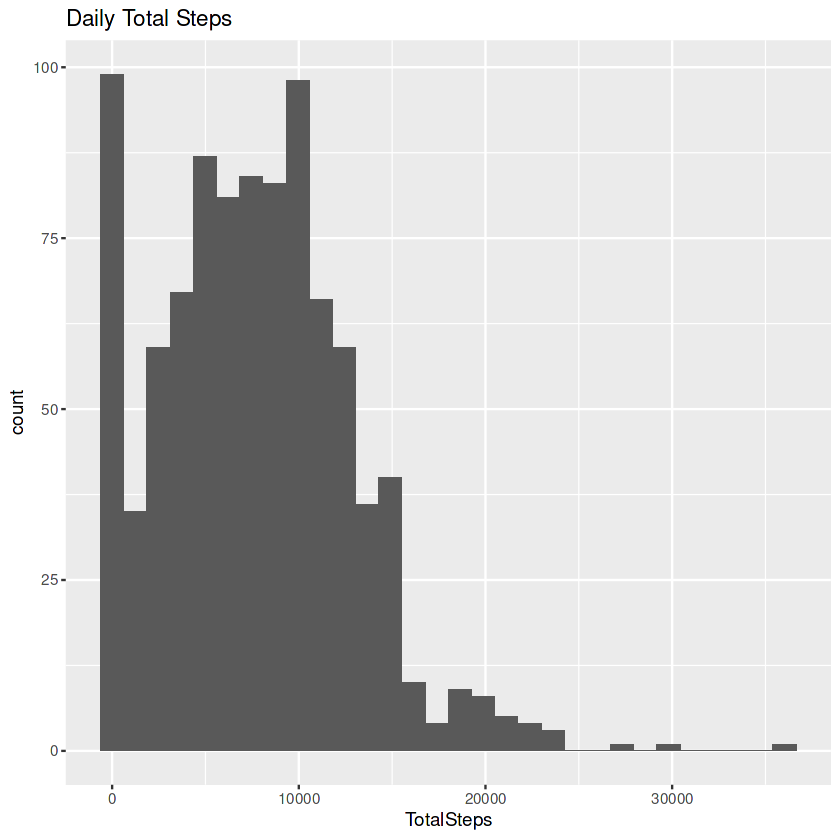

In [12]:
#Visualizing data on TotalSteps
ggplot(data = daily_activity) + 
  geom_histogram(mapping = aes(x = TotalSteps)) + 
  labs(title = 'Daily Total Steps')


The most frequent number of steps are taken between 5000 to 10000 steps. We can see this by looking at the histogram's count and Total Steps variables.

## Calories Burnt
We are going to plot a histogram, representing how many Calories are burnt per day by how many users.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


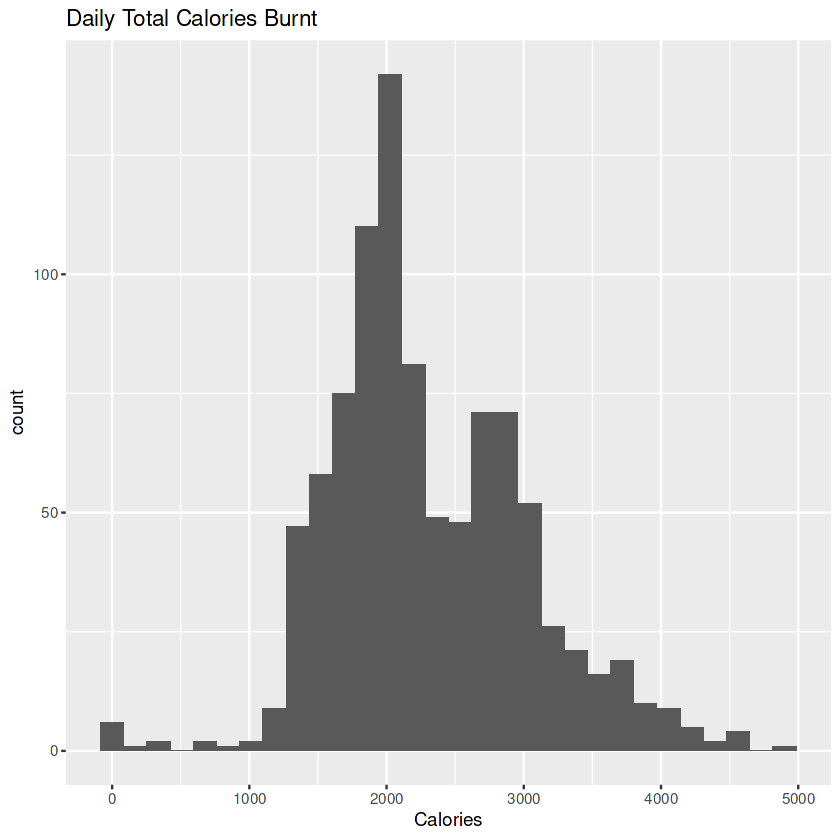

In [13]:
#Visualizing data on Calories
ggplot(data = daily_activity) + 
  geom_histogram(mapping = aes(x = Calories)) + 
  labs(title = 'Daily Total Calories Burnt')

The most frequent calories burnt by users lie between the range 1500-3000.

## Total Active Hours
We are going to plot a histogram, representing the Total Active hours of users.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


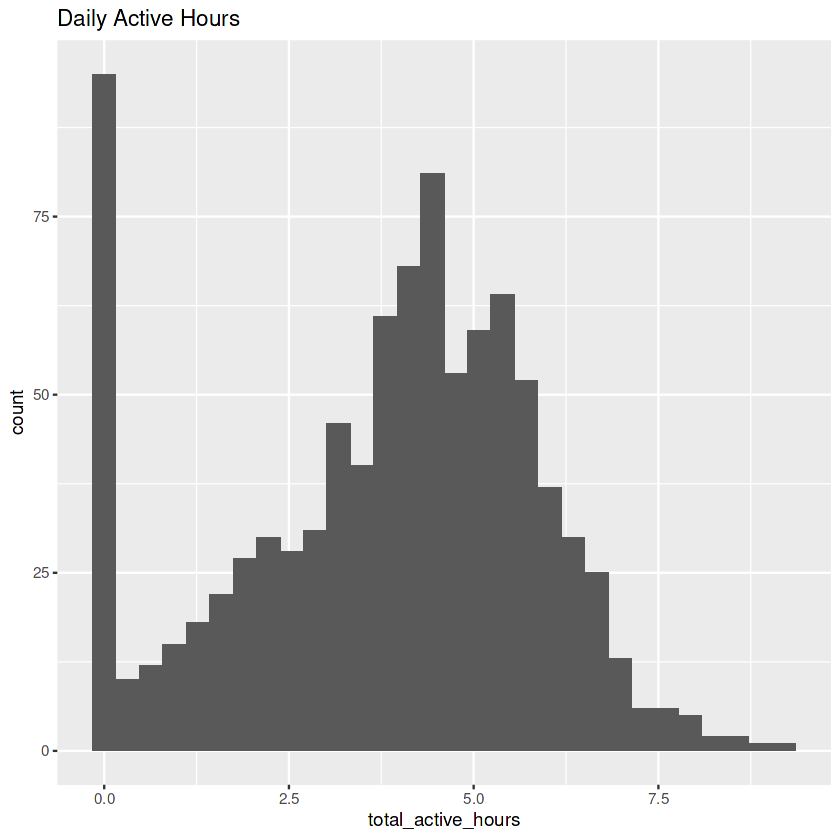

In [14]:
#Visualizing data on total_hours_active
ggplot(data = daily_activity) + 
  geom_histogram(mapping = aes(x = total_active_hours)) + 
  labs(title = 'Daily Active Hours')

# ScatterPlots
## TotalSteps v/s Calories Burnt
We are going to plot a scatterplot, between the variables TotalSteps and Calories Burnt

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


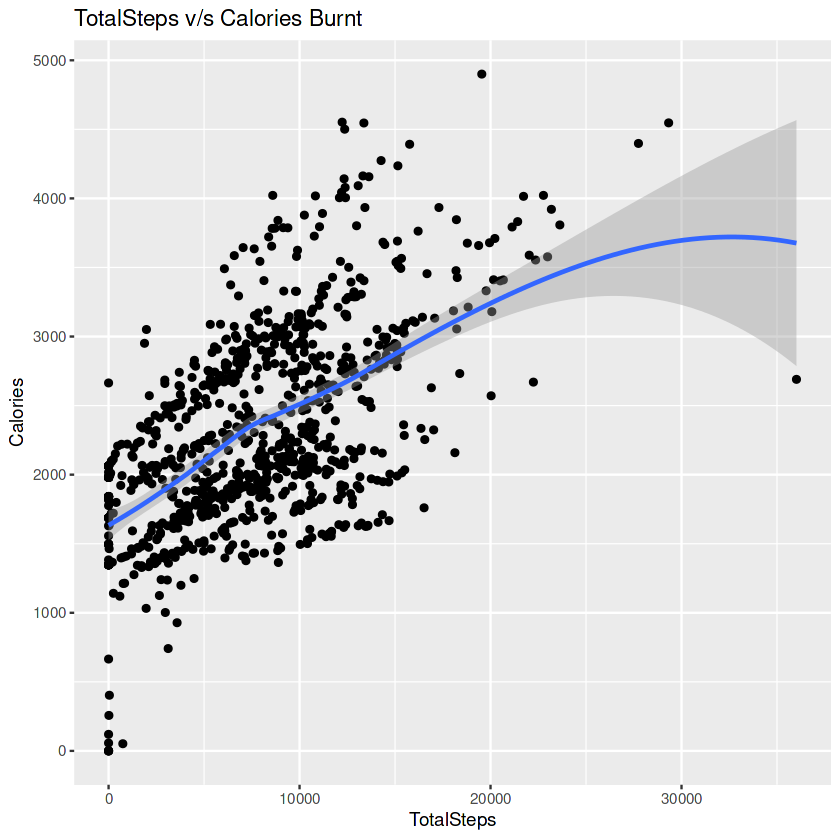

In [15]:
#Visualizing data on TotalSteps v/s Calories Burnt
ggplot(data = daily_activity) + 
  geom_point(mapping = aes(x = TotalSteps, y = Calories)) +
  geom_smooth(mapping = aes(x = TotalSteps, y = Calories)) + 
  labs(title = 'TotalSteps v/s Calories Burnt')

As expected, more the Total Steps, higher the Calories are burnt; as showed in our ScatterPlot. I've also added a smooth line, to show the regression between the 2 variables.

## Total Minutes Asleep v/s Total Time in Bed
Represents how much time users are actually sleeping, versus how much total time they spend in Bed.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


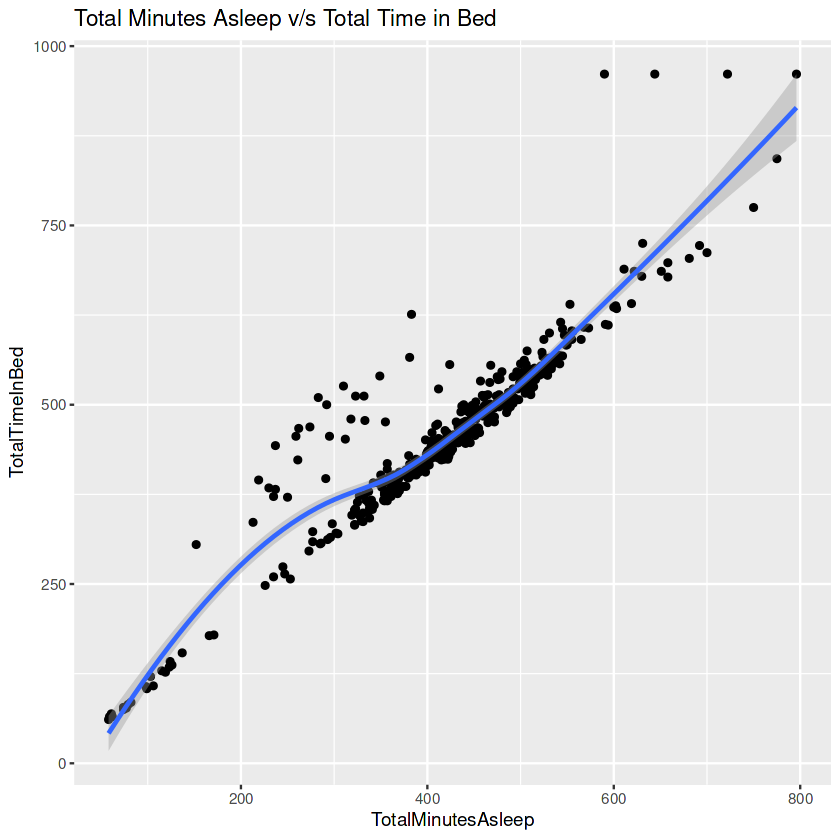

In [16]:
#Visualizing data on Total Minutes Asleep v/s Total Time in Bed
ggplot(data = daily_sleep) + 
  geom_point(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) +
  geom_smooth(mapping = aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) + 
  labs(title = 'Total Minutes Asleep v/s Total Time in Bed')

# *Act Phase*

### **Conclusions**
- Regular physical activity and walking are very important for overall calorie/energy expenditure.
- There are recording issues with weight data, so many users dont enter their data for the same. 
- Calories Burnt data provided includes issues; like many counts of users had data of Burning 0 calories; which is almost impossible.
- Light activities primarily involve walking, while moderate and vigorous activities mainly involve lifting weights and strength training.
- Most users need to do more physical activity to be healthy and a few healthy users are exceeding their exercise time.
- Average sleep time seems right, but some users spend too much time in bed and sleeping.
- The intensity of the activities influences step count and calorie expenditure.
- Most users are sleep deprived and don’t have a good sleep hygiene. 
- Users have different sleep schedules during weekdays compared to weekends.
- Sleeping more makes people more energized and motivated to do more physical activities during the day.

### **Recommendations**

1. Bellabeat should include a feature of goals, that is; if users complete a specific goal, like walking 10,000 steps per day, they will get some discounts on BellaBeat's products.

2. Products like Tracker should have a function of beeping or a sound, in order to remind the users of their daily activities and excercise, if they are lacking or exceeding. 

3. Collaboration with Health Companies and influecers/experts can help grow BellaBeat's reputation among youth and even adults, by using various advertisements.
   
   
### Further Exploration:

- Obtain data from many more users and for a longer time frame like at least one year for a more comprehensive, accurate analysis and to answer the question: What are some monthly trends in Bellabeat smart device usage?
- Obtain data for the Spring product to answer the question: What are some trends in Spring usage and hydration patterns?
- Track the behavior change patterns of Bellabeat users over an extended period to identify sustained engagement, behavior modifications, and long-term impacts of using Bellabeat products on users' health and well-being.
- Conduct user surveys and feedback analysis to understand their experiences and satisfaction with Bellabeat products and the app.
